In [13]:
import numpy as np
def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

def gen_lorenz_series(x0, y0, z0, num_steps, num_freq):
    dt = 0.01
    stepCnt = num_steps

    # Need one more for the initial values
    xs = np.empty((stepCnt,))
    ys = np.empty((stepCnt,))
    zs = np.empty((stepCnt,))

    # Setting initial values
    #xs[0], ys[0], zs[0] = (0., 1., 1.05)
    xs[0] = x0
    ys[0] = y0
    zs[0] = z0

    xss = np.empty((stepCnt//num_freq,))
    yss = np.empty((stepCnt//num_freq,))
    zss = np.empty((stepCnt//num_freq,))
    # Stepping through "time".
    j = 0
    for i in range(stepCnt-1):
        # Derivatives of the X, Y, Z state
        if i%num_freq ==0:
            xss[j] = xs[i]
            yss[j] = ys[i]
            zss[j] = zs[i]
            j += 1
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)

    #save the sequence for training
    lorenz_series = np.transpose(np.vstack((xss,yss,zss)))
    return lorenz_series

### simulate data with inital range

In [ ]:
#define initial range
num_samples = int(1e4)
num_freq = int(5)
num_steps = int(1e2)*num_freq

init_range = np.random.uniform(-0.1,0.1,(num_samples,3))
lorenz_series_mat = np.ndarray((num_samples, num_steps//num_freq, 3))
for i in range(num_samples):
    x0,y0,z0 = init_range[i,:]
    series = gen_lorenz_series(x0,y0,z0, num_steps, num_freq )
    lorenz_series_mat[i,:,:] = series

### simulate train and test in different initial range

In [16]:
num_freq = int(5)
num_steps = int(1e2)*num_freq

#train
train_samples = int(9000)
train_range = np.random.uniform(-0.1,0.1,(train_samples,3))
train_mat = np.ndarray((train_samples, num_steps//num_freq, 3))
for i in range(train_samples):
    x0,y0,z0 = train_range[i,:]
    series = gen_lorenz_series(x0,y0,z0, num_steps, num_freq )
    train_mat[i,:,:] = series
    
    
# test
test_samples = int(1000)
test_range = np.random.uniform(-0.1+1,0.1+1,(test_samples,3))
test_mat = np.ndarray((test_samples, num_steps//num_freq, 3))
for i in range(test_samples):
    x0,y0,z0 = test_range[i,:]
    series = gen_lorenz_series(x0,y0,z0, num_steps, num_freq )
    test_mat[i,:,:] = series
    
# combine
lorenz_mat = np.concatenate((train_mat, test_mat), axis=0 )
print('data shape', lorenz_mat.shape)


data shape (10000, 100, 3)


### visualization of the simulated data

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def normalize_columns(arr):
    def _norm_col(arr):
        rows, cols = arr.shape
        for col in range(cols):
            arr_col = arr[:,col]
            arr[:,col] = (arr_col - arr_col.min() )/ (arr_col.max()- arr_col.min())
        return arr
    if np.ndim(arr) ==3:
        print('3d array')
        for i in range(arr.shape[0]):
            arr[i,:,:] = _norm_col(arr[i,:,:])
        
    else:
        arr = _norm_col(arr)
    return arr

def plot_sample(lorenz_series_mat, sample_id):
    data_mat = lorenz_series_mat[sample_id,:,:]
    T = data_mat.shape[0]

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(data_mat[:T,0], data_mat[:T,1], data_mat[:T,2], 'b')
    ax.scatter(data_mat[:T,0], data_mat[:T,1], data_mat[:T,2], c='r', s=30)

### save the simulation data

In [5]:
print(lorenz_series_mat.shape)

(10000, 100, 3)


### load the simulation data

data shape (10000, 100, 3)


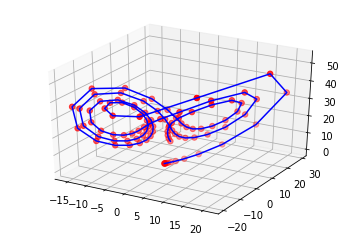

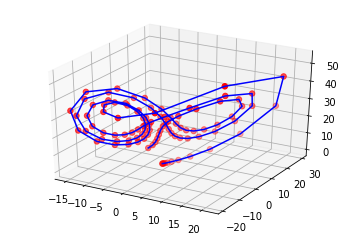

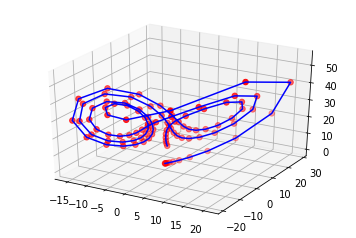

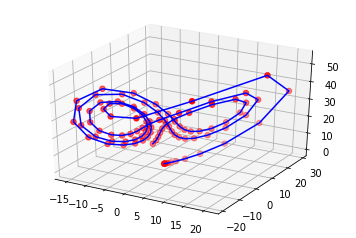

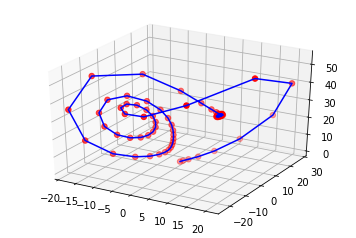

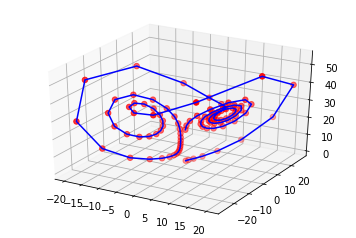

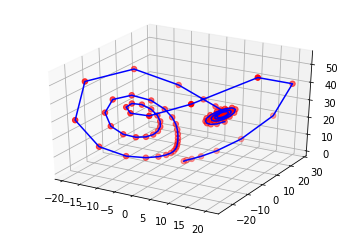

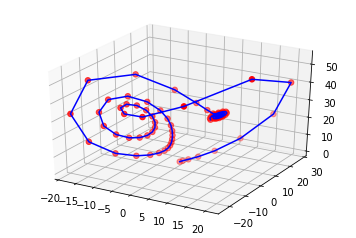

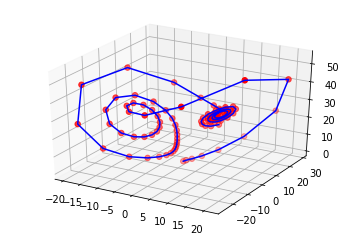

In [19]:
import numpy as np
data_path="../lorenz_tr_te.npy"
lorenz_mat = np.load(data_path)
print('data shape', lorenz_mat.shape)
sample_id = 0
for i in range(1,5):
    plot_sample(lorenz_mat, i)
for i in range(9005,9010):
    plot_sample(lorenz_mat, i)

### append time stamps to the data

In [46]:
ts_stamps = np.tile(np.arange(0,100), (10000,1))
ts_stamps = np.expand_dims(ts_stamps, axis = 2)
print(ts_stamps.shape)
lorenz  = np.concatenate((lorenz_series_mat, ts_stamps), axis=2) 
print(lorenz.shape)

(10000, 100, 1)
(10000, 100, 4)


In [17]:
np.save('../lorenz_tr_te.npy',lorenz_mat)